Empezaremos con el analisis exploratorio de los datos en los datasets.

Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file




C:\Users\Estefani\AppData\Local\Temp\ipykernel_14216\3069921742.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Cargamos los datasets

In [2]:
price_level_coursera = pd.read_csv('data/coursera_price_level.csv')
coursera_reviews = pd.read_csv('data/Coursera_reviews.csv')
edx = pd.read_csv('data/edx_courses.csv')
udemy = pd.read_csv('data/udemy_courses.csv') 

In [11]:
price_level_coursera.head()

,url,price,course_by,title,skills,ratings,reviews,"level, type and duration"
0,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,(35.5k reviews),Mixed · Course · 1-3 Months
1,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,(20.8k reviews),Mixed · Course · 1-3 Months
2,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,(24.4k reviews),Beginner · Course · 1-3 Months
3,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being for Teens,NaN,4.8,(29 reviews),Beginner · Course · 1-3 Months
4,https://www.coursera.org/learn/introduction-ps...,Free,Yale University,Introduction to Psychology,"Business Psychology, Emotional Intelligence, W...",4.9,(25.5k reviews),Beginner · Course · 1-3 Months


In [57]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"pretty dry, but i was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,information was perfect! the program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,a few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,excellent and the training provided was very d...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [18]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [19]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## EDA coursera_reviews

In [20]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [21]:
coursera_reviews.isnull().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

REvisamos valores nulos

In [22]:
coursera_reviews[coursera_reviews.isnull().any(axis=1)]

,reviews,reviewers,date_reviews,rating,course_id
73671,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking
73680,NaN,By Jerold K G,"Jun 10, 2020",5,computer-networking
95147,NaN,By t. d k,"Jun 27, 2020",5,ai-for-everyone
95152,NaN,By KODATHALA S V,"May 29, 2020",5,ai-for-everyone
95172,NaN,By t. d k,"Jun 27, 2020",5,ai-for-everyone
...,...,...,...,...,...
1422276,NaN,By Ritu K,"Aug 04, 2020",4,technical-support-fundamentals
1454669,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking
1454678,NaN,By Jerold K G,"Jun 10, 2020",5,computer-networking
1454691,NaN,By Christopher L J,"Sep 26, 2020",5,computer-networking


Me parecio adecuado llenar los datos nulos por "sin ninguna reseña"

In [23]:
coursera_reviews['reviews'].fillna('sin ninguna reseña', inplace=True)

Para saber que tan estimado son los curos creamos una funcion para unifcar las palabras parecidas, como 'excelente', 'good' y 'great course'

In [24]:
def replace_words(sentence, old_word, new_word):
    for word in old_word:
        sentence = sentence.replace(word, new_word)
    return sentence

In [25]:

coursera_reviews["reviews"] = coursera_reviews["reviews"].str.lstrip()
coursera_reviews["reviews"] = coursera_reviews["reviews"].str.rstrip()


coursera_reviews["reviews"] = coursera_reviews["reviews"].str.lstrip('.!? "')
coursera_reviews["reviews"] = coursera_reviews["reviews"].str.rstrip('.!? "')

#pasamos la columna 'reviews' a minusculas 
coursera_reviews["reviews"] = coursera_reviews["reviews"].str.lower()
#creamos una funcion para unifcar las palabras parecidas, como 'good' y 'good course'

def replace_words(sentence, old_word, new_word):
    for word in old_word:
        sentence = sentence.replace(word, new_word)
    return sentence
old_word = ['excellent course', 'excelente curso', 'excelente', 'excelent']
new_word ='excellent'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['good course']
new_word= 'good'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['great course']
new_word= 'great'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['nice course']
new_word= 'nice'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['muy bueno', 'muy buen curso']
new_word= 'very good'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['very nice course']
new_word= 'very nice'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

old_word= ['amazing course']
new_word= 'amazing'
coursera_reviews['reviews'] = coursera_reviews['reviews'].apply(lambda x: replace_words(x, old_word, new_word))

In [26]:
review=coursera_reviews['reviews'].value_counts()
print(review.head(30))

excellent                  28194
good                       22353
great                      19006
very good                  10378
nice                        7235
amazing                     4367
awesome                     3804
thank you                   2378
awesome course              2120
very nice                   1937
very useful                 1694
thanks                      1598
very informative            1541
very helpful                1536
                            1080
perfect                     1052
great experience             852
best course                  837
very useful course           804
good for beginners           797
very interesting             792
loved it                     763
best                         754
g                            714
fantastic                    710
super                        688
ok                           645
very interesting course      635
wonderful course             622
good one                     588
Name: revi

Veremos esto con un grafico

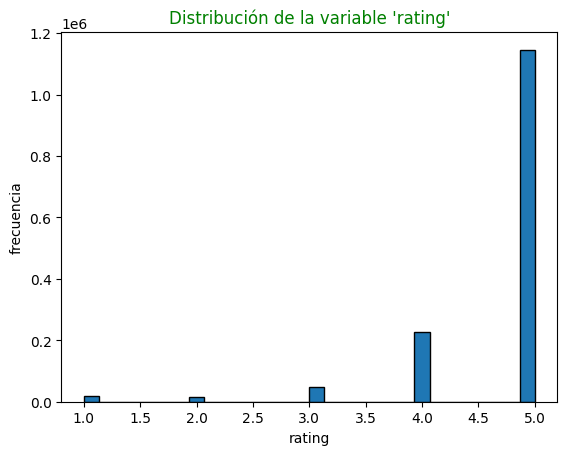

In [27]:
rating = coursera_reviews["rating"]

plt.hist(rating, bins=30, edgecolor='black')
plt.title("Distribución de la variable 'rating'", color='green')
plt.xlabel("rating")
plt.ylabel("frecuencia")
plt.show()

Aqui se observa que la mayoria de los reviews son muy buenos, dado que estos cursos son impartidos por las mejores universidades.

Exportamos el dataset para seguir trabajando en power BI

In [28]:
coursera_reviews.to_csv("coursera_reviews_exportado.csv", index=False)


## EDA edx

In [29]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [30]:
edx.isnull().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

Se borro la columa 'course_syllabus' por no poseer informacion relevante

In [31]:
edx.drop('course_syllabus', axis=1, inplace=True)

Se muestra un grafico para segmentar el numero de cursos por idioma y nivel para analizar el idioma preferido.

C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWar

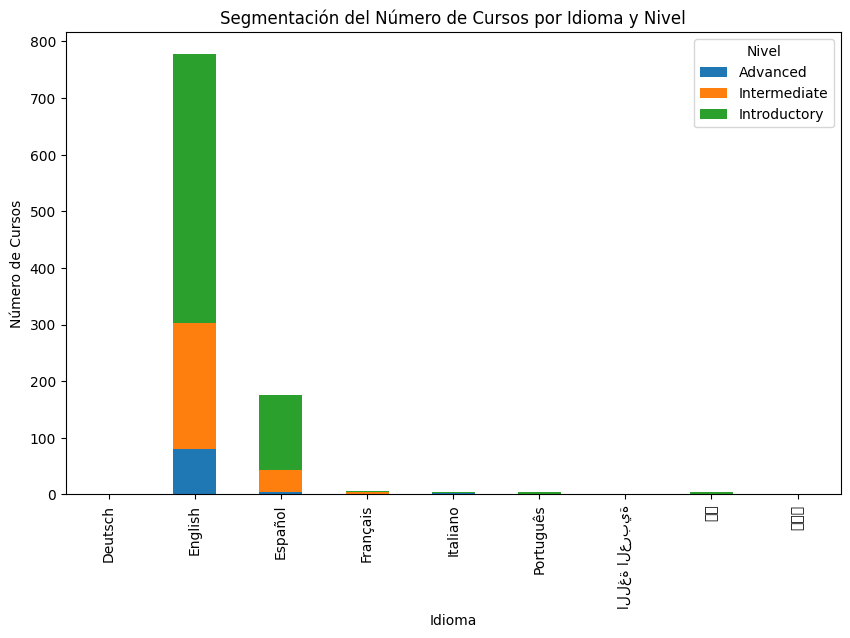

In [32]:
df_edx = pd.read_csv('data/edx_courses.csv', usecols=['language', 'Level'])

df_udemy = pd.read_csv('data/udemy_courses.csv', usecols=['num_subscribers'])

df_edx['source'] = 'edx'
df_udemy['source'] = 'udemy'

# Combinar los datasets
df_combined = pd.concat([df_edx, df_udemy], axis=0)

df_combined.groupby(['language', 'Level']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Segmentación del Número de Cursos por Idioma y Nivel')
plt.xlabel('Idioma')
plt.ylabel('Número de Cursos')
plt.legend(title='Nivel')
plt.show()

Se observa que la demanda de cursos online varía según el idioma en el que se imparten. El gráfico muestra la cantidad de cursos en cada idioma y nos permite identificar los idiomas más populares en el mercado de cursos online.


C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Estefani\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWar

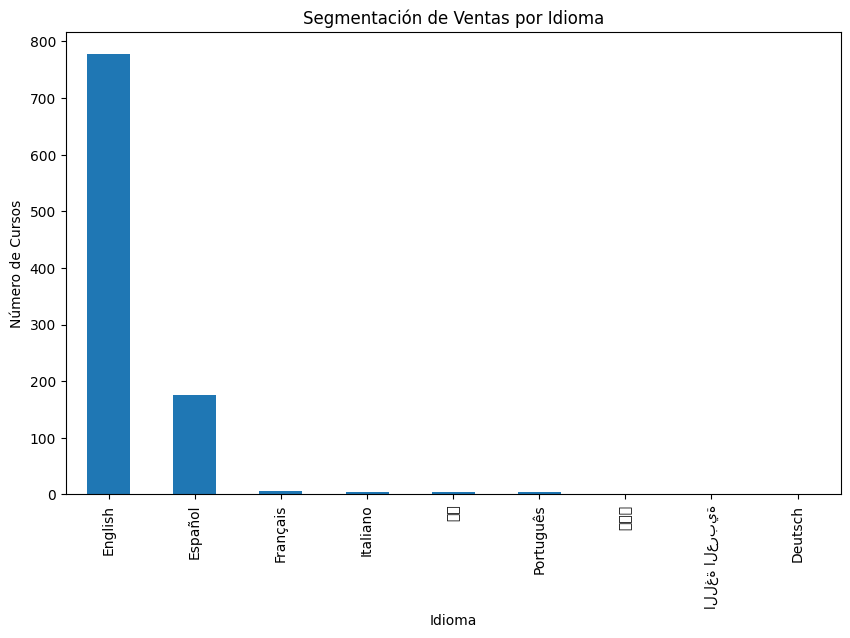

In [33]:
df_segment_language = edx['language'].value_counts()

df_segment_language.plot(kind='bar', figsize=(10, 6))
plt.title('Segmentación de Ventas por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Número de Cursos')
plt.show()


Exportamos el dataset

In [34]:
edx.to_csv("edx_exportado.csv", index=False)


## EDA udemy

In [35]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Revismos la columna 'course_id'

In [36]:
udemy['course_id'].value_counts()

1084454    2
28295      2
185526     2
1157298    2
837322     2
          ..
669174     1
1185898    1
1177156    1
177614     1
297602     1
Name: course_id, Length: 3672, dtype: int64

Borramos los valores duplicados

In [37]:
udemy.drop_duplicates(subset=['course_id'], keep='first',inplace=True)

Revisamos la columna 'published_timestamp'

In [38]:
udemy['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3673    2016-06-14T17:36:46Z
3674    2017-03-10T22:24:30Z
3675    2015-12-30T16:41:42Z
3676    2016-08-11T19:06:15Z
3677    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3672, dtype: object

Convertir la columna "published_timestamp" al tipo de datos de fecha y hora. 

In [40]:
udemy['published_timestamp'] = pd.to_datetime(udemy['published_timestamp'])

Una vez que hayas convertido la columna al tipo de datos de fecha y hora, puedes extraer el mes de cada registro utilizando el atributo

In [41]:
udemy['month'] = udemy['published_timestamp'].dt.month


Después de obtener la columna "month" que representa el mes de publicación de cada curso, puedes calcular el número total de suscriptores para cada mes utilizando el método groupby

In [42]:
monthly_subscribers = udemy.groupby('month')['num_subscribers'].sum()

Finalmente, para determinar el mes con el mayor número de suscriptores, puedes utilizar el método .idxmax()

In [58]:
max_month = monthly_subscribers.idxmax()

In [59]:
max_month

10

Aálisis del número de suscriptores por mes para mostrar comparaciones entre diferentes categorías.

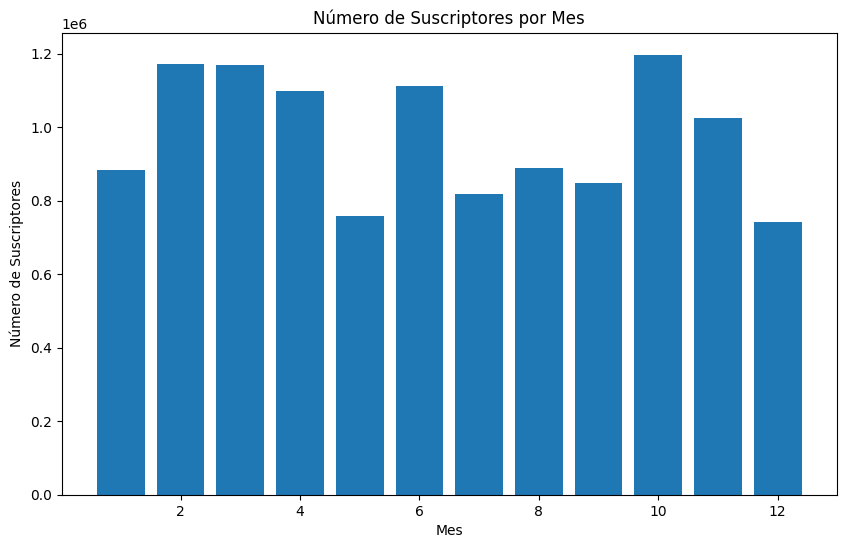

In [45]:
monthly_subscribers = udemy.groupby('month')['num_subscribers'].sum()


plt.figure(figsize=(10, 6))  
plt.bar(monthly_subscribers.index, monthly_subscribers.values)
plt.title('Número de Suscriptores por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Suscriptores')
plt.show()

Ahora me di cuenta que este puede ser un buen KPI 

In [46]:
subscribers_october = udemy[udemy['month'] == 10]['num_subscribers']
total_subscribers_october = subscribers_october.sum()
print("Número de suscriptores en el mes 10:", total_subscribers_october)

Número de suscriptores en el mes 10: 1197429


Se representa la distribución de precios. Esto permitirá observar la frecuencia de cursos en diferentes rangos de precios y tener una idea de cómo se distribuyen los precios en general. Estos gráficos permite analizar la segmentación de precios y obtener información valiosa sobre cómo se distribuyen los precios de los cursos y si existen diferencias significativas en los rangos de precios entre diferentes categorías o tipos de cursos.

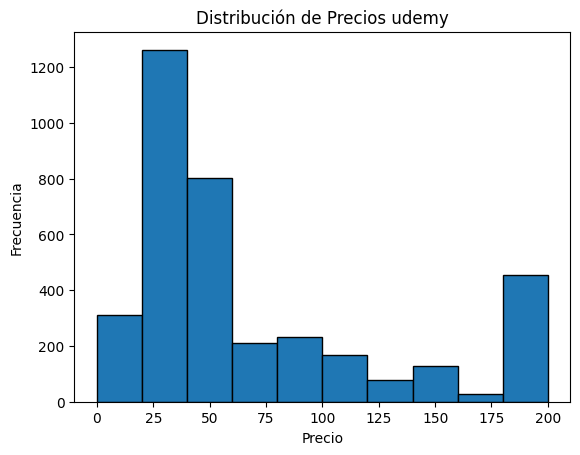

In [47]:
plt.hist(udemy['price'], bins=10, edgecolor='black')
plt.title('Distribución de Precios udemy')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()


Segmentacion de precios en udemy y edx

Se compara la diferencia de precios en ambos datasets. El histograma nos permite observar la distribución de los precios en los dos datasets analizados. 


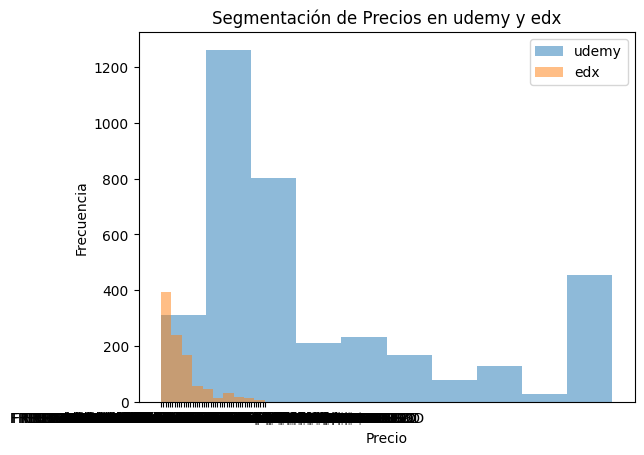

In [48]:

# Histograma de precios del primer dataset
plt.hist(udemy['price'], bins=10, alpha=0.5, label='udemy')

# Histograma de precios del segundo dataset
plt.hist(edx['price'], bins=10, alpha=0.5, label='edx')

plt.title('Segmentación de Precios en udemy y edx')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()



Ahora segmentamos por precio. El gráfico muestra la distribución de los cursos en diferentes rangos de precios. Podemos observar cuántos cursos se encuentran en cada rango de precios y cómo se compara la demanda en cada uno.

Podemos analizar cómo varía el número de suscriptores en función del precio de los cursos. Se pueden identificar tendencias o patrones en los datos que indiquen si existe una relación directa o inversa entre el precio y la demanda.

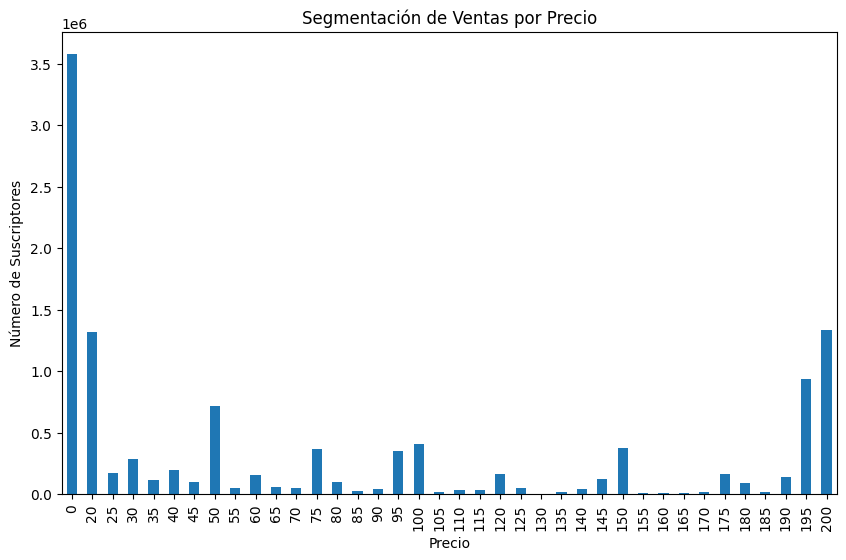

In [49]:
df_segment_price = udemy.groupby('price')['num_subscribers'].sum()

# Gráfico de barras para segmentación por precio
df_segment_price.plot(kind='bar', figsize=(10, 6))
plt.title('Segmentación de Ventas por Precio')
plt.xlabel('Precio')
plt.ylabel('Número de Suscriptores')
plt.show()


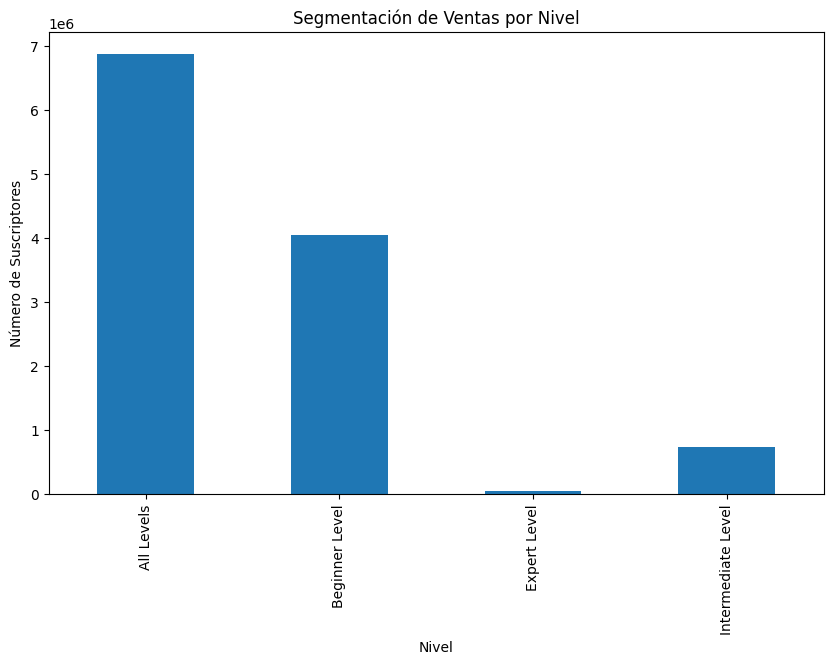

In [50]:

df_segment_level = udemy.groupby('level')['num_subscribers'].sum()

df_segment_level.plot(kind='bar', figsize=(10, 6))
plt.title('Segmentación de Ventas por Nivel')
plt.xlabel('Nivel')
plt.ylabel('Número de Suscriptores')
plt.show()

Exportamos el dataset para trabajar con el dashboard

In [51]:
udemy.to_csv("udemy_exportado.csv", index=False)

## EDA price_level_coursera

In [52]:
price_level_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       988 non-null    object 
 1   price                     956 non-null    object 
 2   course_by                 988 non-null    object 
 3   title                     988 non-null    object 
 4   skills                    806 non-null    object 
 5   ratings                   946 non-null    float64
 6   reviews                   946 non-null    object 
 7   level, type and duration  988 non-null    object 
dtypes: float64(1), object(7)
memory usage: 61.9+ KB


In [53]:
price_level_coursera.isnull().sum()

url                           0
price                        32
course_by                     0
title                         0
skills                      182
ratings                      42
reviews                      42
level, type and duration      0
dtype: int64

Realizamos una funcion para detectar el lenguaje del curso teniendo en cuenta el titulo

In [54]:
course_counts = price_level_coursera['course_by'].value_counts()
print(course_counts)
print('Proveedor con mayor número de cursos:', course_counts.idxmax())
print('Proveedor con menor número de cursos:', course_counts.idxmin())


Yale University                            37
Coursera Project Network                   32
University of Geneva                       32
Universidad Nacional Autónoma de México    32
National Taiwan University                 29
                                           ..
UiPath                                      1
University of Glasgow                       1
emlyon business school                      1
University of North Texas                   1
New Teacher Center                          1
Name: course_by, Length: 156, dtype: int64
Proveedor con mayor número de cursos: Yale University
Proveedor con menor número de cursos: Case Western Reserve University


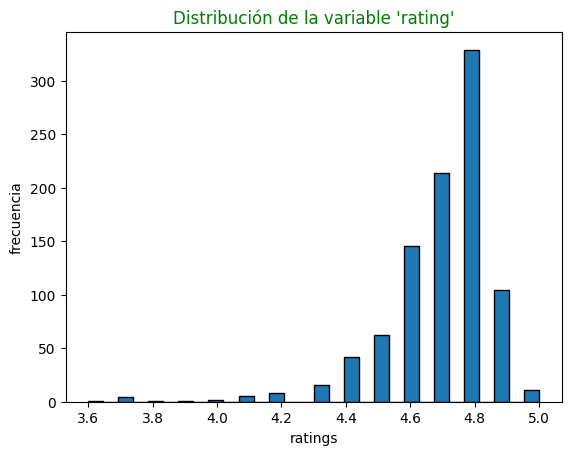

In [55]:
# seleccionamos la variable para crear un histograma
rating = price_level_coursera["ratings"]

plt.hist(rating, bins=30, edgecolor='black')
plt.title("Distribución de la variable 'rating'", color='green')
plt.xlabel("ratings")
plt.ylabel("frecuencia")
plt.show()

Exportamos el dataset

In [56]:
price_level_coursera.to_csv("price_level_coursera_exportado.csv", index=False)